In [ ]:
# Installing GDAL
! add-apt-repository -y ppa:ubuntugis/ppa  && apt-get update  && apt-get install -y python-numpy gdal-bin libgdal-dev 

# Installing libspatialindex and RTree
!wget http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz -O /tmp/spatialindex-src.tar.gz && tar -xvf /tmp/spatialindex-src.tar.gz -C /tmp
%cd /tmp/spatialindex-src-1.8.5
! ./configure && make && make install && ldconfig && pip install Rtree==0.8.3

!pip uninstall geopandas -y && pip install geopandas==0.6.3
!pip uninstall networkx -y && pip install networkx==2.3
!pip install rasterio==1.0.22

In [ ]:
!git clone https://github.com/kstepanov7/apls
!pip install simplification
!git clone https://github.com/Image-Py/sknw
!pip install utm

In [2]:
from PIL import Image
import numpy as np
from apls.calc_apls import calc_apls
import matplotlib.pyplot as plt

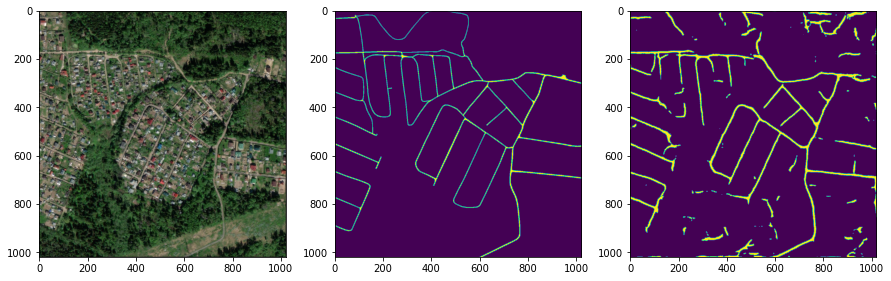

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [3]:
img_path = '/content/apls/images/image.tif'
image = Image.open(img_path)

mask_p = Image.open('/content/apls/images/mask_prop.tif')
mask_p = np.array(mask_p, dtype=np.float)

mask_gt = Image.open('/content/apls/images/mask_gt.tif')
mask_gt = np.array(mask_gt, dtype=np.float)

fig, ax = plt.subplots(1,3, figsize=(15,50))

ax[0].imshow(image)
ax[1].imshow(mask_gt)
ax[2].imshow(mask_p)
plt.show()

score = calc_apls(mask_gt, mask_p, img_path, apls_only=False)

In [4]:
print('APLS metric', score[0])
print('TOPO metric', score[1])
print('SP metric', score[2])

APLS metric 0.2461938518513772
TOPO metric (111, 194, 1134, 0.3639344262295082, 0.0891566265060241, 0.1432258064516129)
SP metric 0.030508474576271188


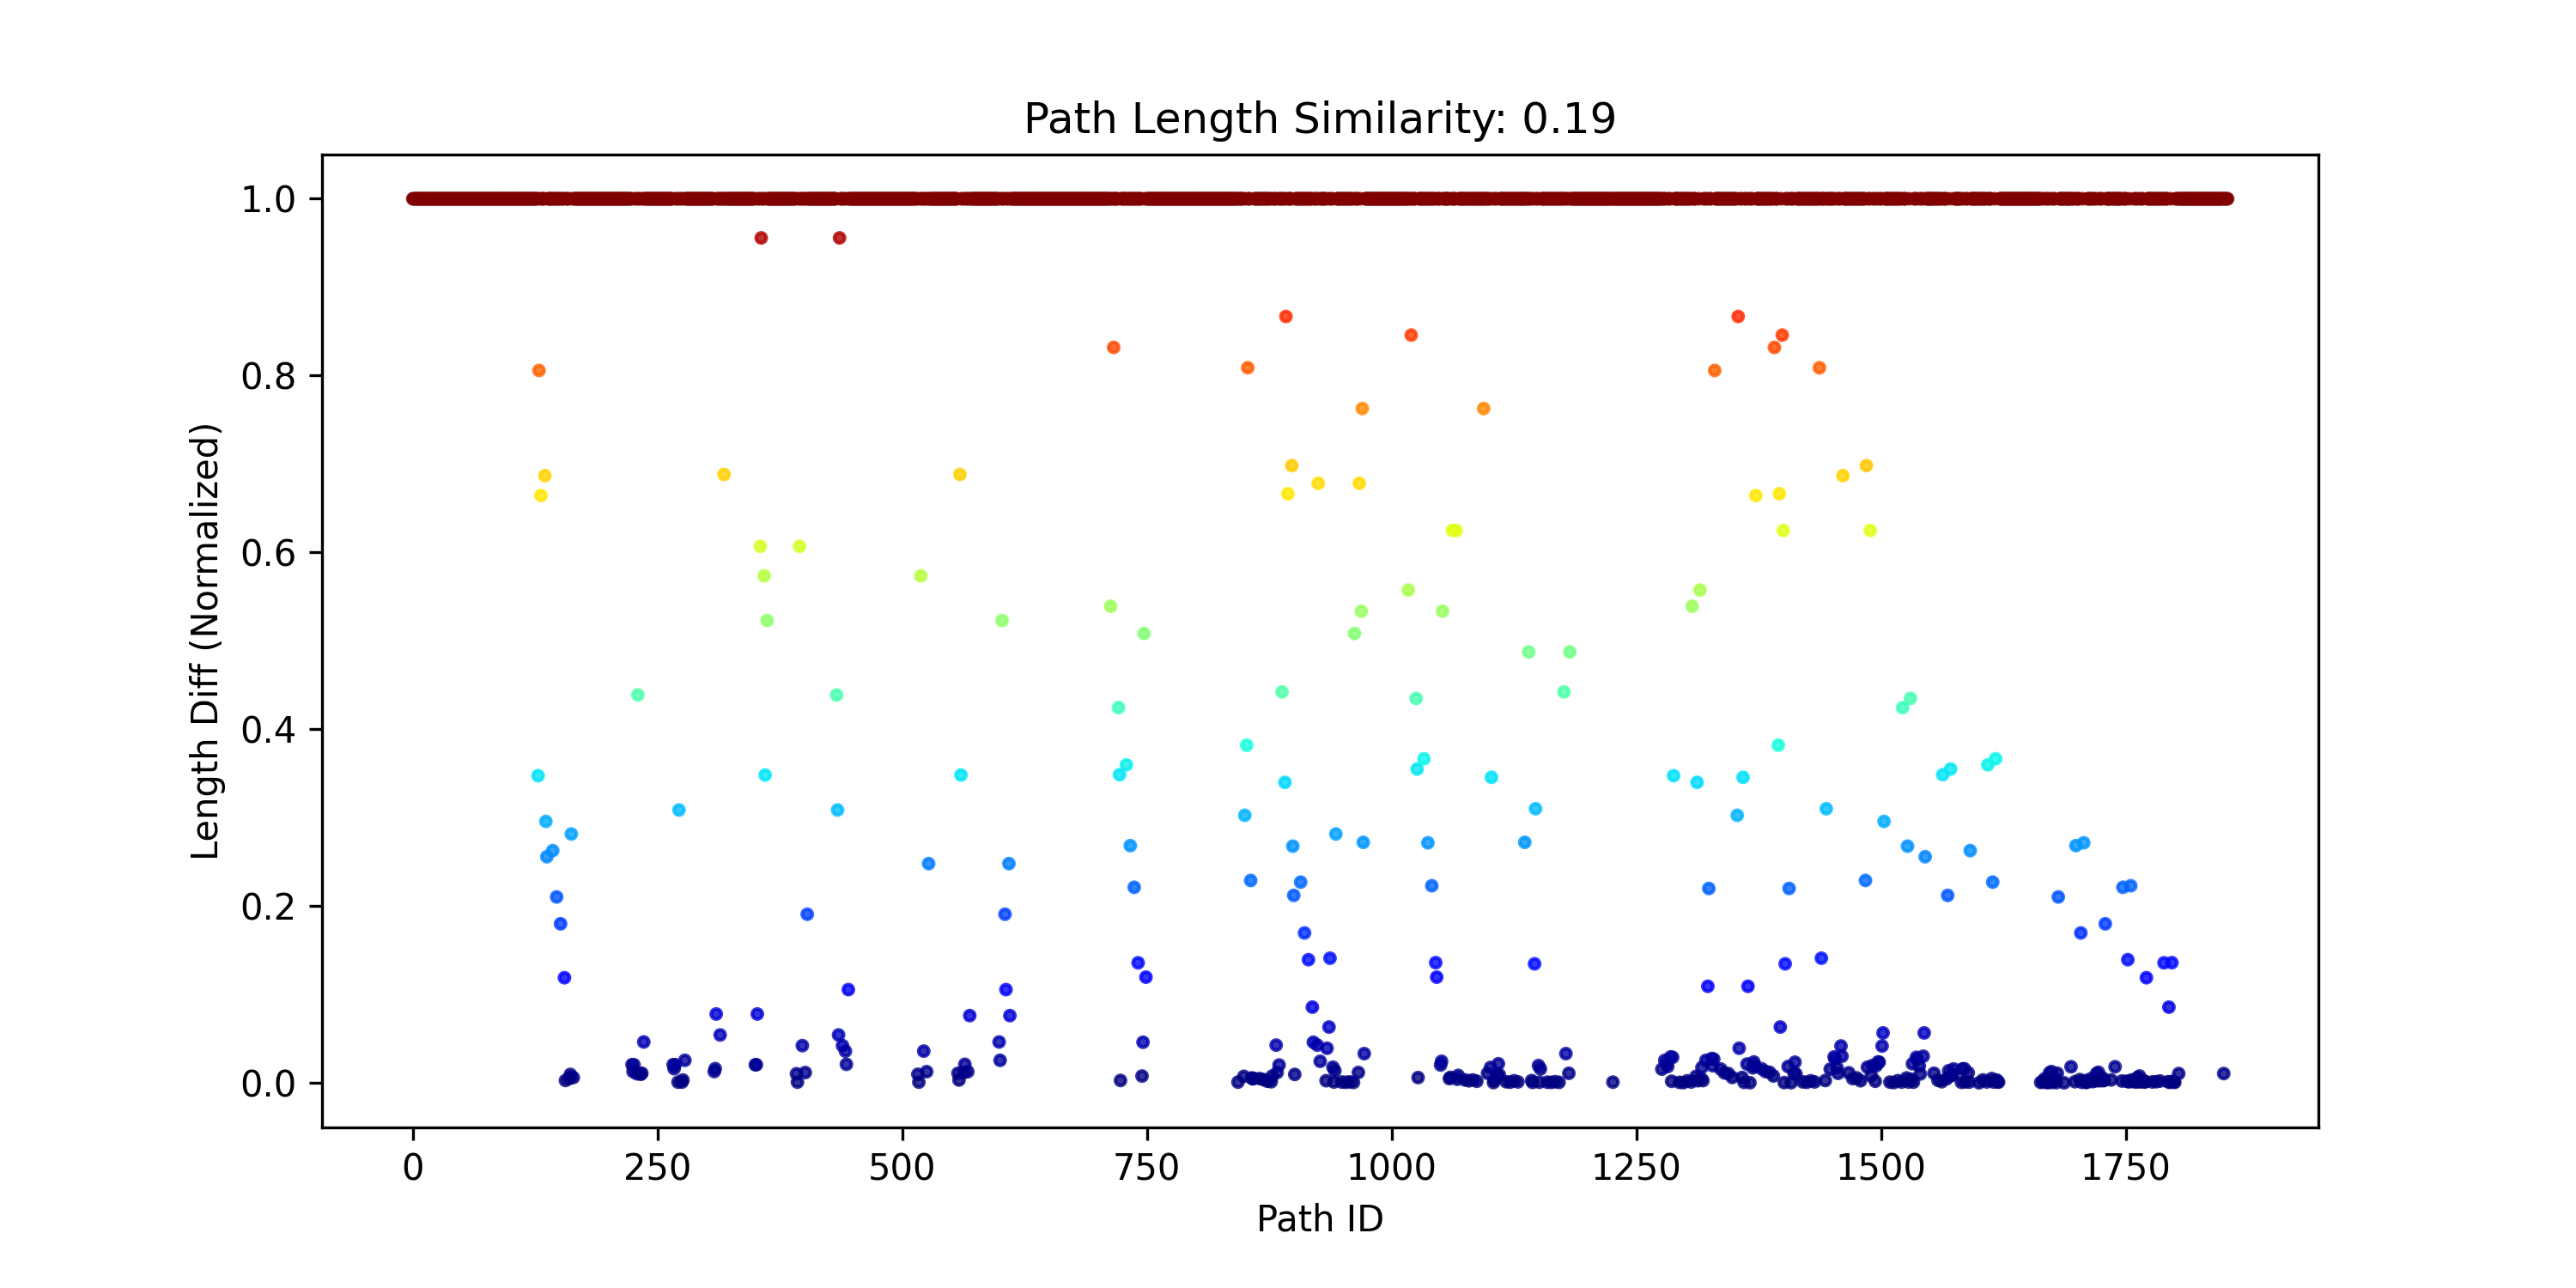

In [6]:
Image.open('/content/apls/outputs/image/weight=length/image.tif/all_pairs_paths_diffs_gt_to_prop.png')